In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Necessário excluir as 2 últimas linhas do arquivo para evitar 2 linhas nulas.

In [2]:
rec2009 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2009.csv",header=0,encoding="ISO-8859-9",delimiter=";")

/home/fabio/dev/anaconda3/envs/Univali/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rec2009.head()

,anocalendario,DataArquivamento,DataAbertura,codigoregiao,regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,CBP SUL - COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1.350934e+12,...,3104700.0,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,7.46803e+07
1,2009,2009-05-12 12:05:08.000,2006-01-17 12:10:53.000,3,Sudeste,RJ,GRADIENTE,NaN,1,4.318536e+13,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,146,Aparelho DVD,107,Não entrega/demora na entrega do produto,F,entre 51 a 60 anos,2.35102e+07
2,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,IGL INDÚSTRIA LTDA,ELIDA PONDS INDUSTRIAL LTDA,1,3.085759e+12,...,2063100.0,"FABRICAÇÃO DE COSMÉTICOS, PRODUTOS DE PERFUMAR...",N,224,Produto Para Uso Veterinário ( Medicamento / S...,177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,7.4775e+07
3,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,UNILEVER BESTFOODS BRASIL LTDA,UNILEVER,1,1.615814e+12,...,1031700.0,FABRICAÇÃO DE CONSERVAS DE FRUTAS,N,224,Produto Para Uso Veterinário ( Medicamento / S...,177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,7.4775e+07
4,2009,2009-07-23 11:57:40.000,2006-01-18 15:35:29.000,3,Sudeste,RJ,EMPRESA BRASILEIRA DE TELECOMUNICAÇÕES S.A,EMBRATEL - LIVRE,1,3.353049e+13,...,6110899.0,SERVIÇOS DE TELECOMUNICAÇÕES POR FIO NÃO ESPEC...,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,143,Contrato - Rescisão/alteração unilateral,F,entre 41 a 50 anos,2.07103e+07


In [4]:
def view_df_stats(df):
    print("Shape of df={}".format(df.shape))
    print("Number of index levels:{}".format(df.index.nlevels))
    for i in range(df.index.nlevels):
        print("For index level {},unique values count={}".format(i,df.index.get_level_values(i).unique().shape[0]))
    print("Columns of df={}".format(df.columns))
    print("Null count= \n {}".format(df.isnull().sum()))
    print(df.describe())
    

In [5]:
view_df_stats(rec2009)

Shape of df=(104867, 23)
Number of index levels:1
For index level 0,unique values count=104867
Columns of df=Index(['anocalendario', 'DataArquivamento', 'DataAbertura', 'codigoregiao',
       'regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'radicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')
Null count= 
 anocalendario                0
DataArquivamento             0
DataAbertura                 0
codigoregiao                 0
regiao                       0
UF                           0
strRazaoSocial               0
strNomeFantasia          14317
Tipo                         0
NumeroCNPJ                5845
radicalCNPJ               5920
RazaoSocialRFB            6071
NomeFantasiaRFB          56766
CNAEPrincipal             6

Plot Faixa etária por quantidade de reclamações.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

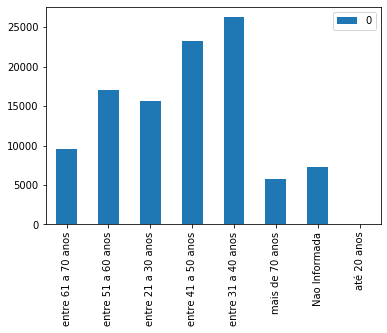

In [6]:
from collections import Counter
age_counter = Counter(rec2009['FaixaEtariaConsumidor'])
df = pd.DataFrame.from_dict(age_counter, orient='index')
df.plot(kind='bar')